# Day6: Text Processing in Python

In [557]:
import pandas as pd
from bs4 import BeautifulSoup
from requests import get

In [525]:
import nltk

In [558]:
#nltk.download('averaged_perceptron_tagger')

In [559]:
#loading IMDB dataset: https://www.imdb.com/

fileLoc = 'imdb.csv'  #path to dataset
movieData = pd.read_csv(fileLoc)
movieData.head() #extract top 5 rows

,fn,tid,title,wordsInTitle,url,imdbRating,ratingCount,duration,year,type,...,News,RealityTV,Romance,SciFi,Short,Sport,TalkShow,Thriller,War,Western
0,titles01/tt0012349,tt0012349,Der Vagabund und das Kind (1921),der vagabund und das kind,http://www.imdb.com/title/tt0012349/,8.4,40550.0,3240.0,1921.0,video.movie,...,0,0,0,0,0,0,0,0,0,0
1,titles01/tt0015864,tt0015864,Goldrausch (1925),goldrausch,http://www.imdb.com/title/tt0015864/,8.3,45319.0,5700.0,1925.0,video.movie,...,0,0,0,0,0,0,0,0,0,0
2,titles01/tt0017136,tt0017136,Metropolis (1927),metropolis,http://www.imdb.com/title/tt0017136/,8.4,81007.0,9180.0,1927.0,video.movie,...,0,0,0,1,0,0,0,0,0,0
3,titles01/tt0017925,tt0017925,Der General (1926),der general,http://www.imdb.com/title/tt0017925/,8.3,37521.0,6420.0,1926.0,video.movie,...,0,0,0,0,0,0,0,0,0,0
4,titles01/tt0021749,tt0021749,Lichter der Großstadt (1931),lichter der gro stadt,http://www.imdb.com/title/tt0021749/,8.7,70057.0,5220.0,1931.0,video.movie,...,0,0,1,0,0,0,0,0,0,0


In [560]:
expData = movieData[0:10]  #will work on top-10 rows to show how to scrape movie description

In [561]:
expData.head()

,fn,tid,title,wordsInTitle,url,imdbRating,ratingCount,duration,year,type,...,News,RealityTV,Romance,SciFi,Short,Sport,TalkShow,Thriller,War,Western
0,titles01/tt0012349,tt0012349,Der Vagabund und das Kind (1921),der vagabund und das kind,http://www.imdb.com/title/tt0012349/,8.4,40550.0,3240.0,1921.0,video.movie,...,0,0,0,0,0,0,0,0,0,0
1,titles01/tt0015864,tt0015864,Goldrausch (1925),goldrausch,http://www.imdb.com/title/tt0015864/,8.3,45319.0,5700.0,1925.0,video.movie,...,0,0,0,0,0,0,0,0,0,0
2,titles01/tt0017136,tt0017136,Metropolis (1927),metropolis,http://www.imdb.com/title/tt0017136/,8.4,81007.0,9180.0,1927.0,video.movie,...,0,0,0,1,0,0,0,0,0,0
3,titles01/tt0017925,tt0017925,Der General (1926),der general,http://www.imdb.com/title/tt0017925/,8.3,37521.0,6420.0,1926.0,video.movie,...,0,0,0,0,0,0,0,0,0,0
4,titles01/tt0021749,tt0021749,Lichter der Großstadt (1931),lichter der gro stadt,http://www.imdb.com/title/tt0021749/,8.7,70057.0,5220.0,1931.0,video.movie,...,0,0,1,0,0,0,0,0,0,0


In [562]:
#for TF IDF vectorizer, only text is required. So, a new table with title and url
#is created out of expData

urlData = expData[['title', 'url']]

In [563]:
urlData.head()  #top 5 rows

,title,url
0,Der Vagabund und das Kind (1921),http://www.imdb.com/title/tt0012349/
1,Goldrausch (1925),http://www.imdb.com/title/tt0015864/
2,Metropolis (1927),http://www.imdb.com/title/tt0017136/
3,Der General (1926),http://www.imdb.com/title/tt0017925/
4,Lichter der Großstadt (1931),http://www.imdb.com/title/tt0021749/


In [564]:
#how to scrape website to extract movie description

testUrl = 'http://www.imdb.com/title/tt0017136/'  #metropolis
dataAtUrl = get(testUrl)
type(dataAtUrl)

requests.models.Response

In [565]:
html_soup = BeautifulSoup(dataAtUrl.text, 'html.parser') #use Inspect Element (right click)
print(html_soup)  #html text at the url


<!DOCTYPE html>

<html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="app-id=342792525, app-argument=imdb:///title/tt0017136?src=mdot" name="apple-itunes-app"/>
<script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:'java'};</script>
<script>
    if (typeof uet == 'function') {
      uet("bb", "LoadTitle", {wb: 1});
    }
</script>
<script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>
<title>Metropolis (1927) - IMDb</title>
<script>(function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);</script>
<script>
    if (typeof uet == 'function') {
      uet("be", "LoadTitle", {wb: 1});
    }
</script>
<script>
    if (typeof uex == 'function') {
      uex("ld", "LoadTitle", {wb: 1});
    }
</script>
<link href="https://www.imdb.

In [566]:
movie_data= html_soup.find_all('div', class_ = 'summary_text') 
print(movie_data)

[<div class="summary_text">
                    In a futuristic city sharply divided between the working class and the city planners, the son of the city's mastermind falls in love with a working class prophet who predicts the coming of a savior to mediate their differences.
            </div>]


In [567]:
type(movie_data) #a set of cases which matches class "summary text" in tag <div>

bs4.element.ResultSet

In [568]:
for item in movie_data: #printing all such cases
    print(item.text)


                    In a futuristic city sharply divided between the working class and the city planners, the son of the city's mastermind falls in love with a working class prophet who predicts the coming of a savior to mediate their differences.
            


In [569]:
#as we note, there is only one, so we can also use index directly

print(movie_data[0].text)


                    In a futuristic city sharply divided between the working class and the city planners, the son of the city's mastermind falls in love with a working class prophet who predicts the coming of a savior to mediate their differences.
            


In [570]:
#in the above output, there are whitespaces in the beginning and end of the text. 
# to remove whitespace, we use strip()

print(movie_data[0].text.strip())

In a futuristic city sharply divided between the working class and the city planners, the son of the city's mastermind falls in love with a working class prophet who predicts the coming of a savior to mediate their differences.


# Bag of Words

In [571]:
#loading tf idf dataset

fileLoc = 'MovieDesc.csv'
movieData = pd.read_csv(fileLoc)

In [572]:
movieData #to check the data in file

,Unnamed: 0,title,url,desc
0,0,Der Vagabund und das Kind (1921),http://www.imdb.com/title/tt0012349/,"The Tramp cares for an abandoned child, but ev..."
1,1,Goldrausch (1925),http://www.imdb.com/title/tt0015864/,A prospector goes to the Klondike in search of...
2,2,Metropolis (1927),http://www.imdb.com/title/tt0017136/,In a futuristic city sharply divided between t...
3,3,Der General (1926),http://www.imdb.com/title/tt0017925/,When Union spies steal an engineer's beloved l...
4,4,Lichter der Großstadt (1931),http://www.imdb.com/title/tt0021749/,"With the aid of a wealthy erratic tippler, a d..."
5,5,M (1931),http://www.imdb.com/title/tt0022100/,When the police in a German city are unable to...
6,6,Es geschah in einer Nacht (1934),http://www.imdb.com/title/tt0025316/,A spoiled heiress running away from her family...
7,7,Moderne Zeiten (1936),http://www.imdb.com/title/tt0027977/,The Tramp struggles to live in modern industri...
8,8,Vom Winde verweht (1939),http://www.imdb.com/title/tt0031381/,A manipulative woman and a roguish man conduct...
9,9,Mr. Smith geht nach Washington (1939),http://www.imdb.com/title/tt0031679/,A naive man is appointed to fill a vacancy in ...


In [573]:
token_dict = {}  # data structure alert!! --Dictionary (refer https://docs.python.org/3/tutorial/datastructures.html)

## Sentence Tokenizer

In [574]:
testDoc = movieData.iloc[4]['desc']
print(testDoc)

With the aid of a wealthy erratic tippler, a dewy-eyed tramp who has fallen in love with a sightless flower girl accumulates money to be able to help her medically.


In [575]:
#breaks a document (a collection of sentences) in separate sentences

from nltk import sent_tokenize

sentences = sent_tokenize(testDoc)

print(sentences)

['With the aid of a wealthy erratic tippler, a dewy-eyed tramp who has fallen in love with a sightless flower girl accumulates money to be able to help her medically.']


## Tokenization

In [576]:
from nltk import word_tokenize as tokenizer  #for tokenization of string (movie description)

testData = 'A girl mets a tramp.'
testTokens = tokenizer(testData)
print(testTokens)

['A', 'girl', 'mets', 'a', 'tramp', '.']


In [577]:
#part of speech tagging
#Useful in identifying content words that is, noun, verb, adjective and adverb

from nltk import pos_tag as posTagger
taggedTokens = posTagger(testTokens)
print(taggedTokens)

[('A', 'DT'), ('girl', 'JJ'), ('mets', 'NNS'), ('a', 'DT'), ('tramp', 'NN'), ('.', '.')]


## Stemming

In [578]:
from nltk.stem.porter import *       # for stemming, to maintain uniformity

#Porter stemmer: http://snowball.tartarus.org/algorithms/porter/stemmer.html
stemmer = PorterStemmer() #stemming: children -> child 
testStem = [] #list in which we store stemmed words
for token in testTokens:
    testStem.append(stemmer.stem(token))

In [579]:
print(testStem) #notice the truncated tokens

['A', 'girl', 'met', 'a', 'tramp', '.']


## StopWords

In [580]:
from nltk.corpus import stopwords    #recall, content words vs stop words

stopWordEng = stopwords.words('english') #list of stop words such as the, was for English language

In [581]:
print(stopWordEng)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [590]:
#adding punctuation in stop word list
punc = ['!', '.', ',']
for symbol in punc:
    stopWordEng.append(symbol)
    
print(stopWordEng)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

## Building Vocabulary




In [591]:
for doc in movieData['desc']:
    sentences = sent_tokenize(doc)
    for line in sentences:
        line = line.lower() #convert string to lower case
        tokens = tokenizer(line)
        stemWord = [stemmer.stem(token) for token in tokens]
        for word in stemWord:
            if not word.isdigit():
                if word not in stopWordEng:
                    if word in token_dict:
                        token_dict[word]+=1
                    else:
                        token_dict[word]=1

In [592]:
# for key in token_dict:
#     if (key==','):
#         del token_dict[',']

In [593]:
print(token_dict)

{'tramp': 15, 'care': 21, 'abandon': 15, 'child': 42, 'event': 51, 'put': 30, 'relationship': 57, 'jeopardi': 3, '.': 1198, 'prospector': 12, 'goe': 54, 'klondik': 3, 'search': 57, 'gold': 27, 'find': 306, 'futurist': 12, 'citi': 105, 'sharpli': 3, 'divid': 21, 'work': 120, 'class': 12, 'planner': 3, 'son': 117, "'s": 627, 'mastermind': 3, 'fall': 87, 'love': 165, 'prophet': 3, 'predict': 3, 'come': 84, 'savior': 6, 'mediat': 3, 'differ': 36, 'union': 9, 'spi': 24, 'steal': 27, 'engin': 3, 'belov': 9, 'locomot': 3, 'pursu': 33, 'single-handedli': 3, 'straight': 3, 'enemi': 42, 'line': 36, 'aid': 21, 'wealthi': 24, 'errat': 3, 'tippler': 3, 'dewy-ey': 3, 'ha': 201, 'fallen': 6, 'sightless': 3, 'flower': 3, 'girl': 114, 'accumul': 3, 'money': 36, 'abl': 9, 'help': 168, 'medic': 21, 'polic': 63, 'german': 57, 'unabl': 12, 'catch': 18, 'child-murder': 3, 'crimin': 39, 'join': 48, 'manhunt': 6, 'spoil': 6, 'heiress': 12, 'run': 66, 'away': 27, 'famili': 192, 'man': 285, 'actual': 18, 'repor

In [594]:
#unique words in corpus
len(token_dict)

4621

In [595]:
import operator

sorted_dict = sorted(token_dict.items(), key=operator.itemgetter(1))
print(sorted_dict)

[('jeopardi', 3), ('klondik', 3), ('sharpli', 3), ('planner', 3), ('mastermind', 3), ('prophet', 3), ('predict', 3), ('mediat', 3), ('engin', 3), ('locomot', 3), ('single-handedli', 3), ('straight', 3), ('errat', 3), ('tippler', 3), ('dewy-ey', 3), ('sightless', 3), ('flower', 3), ('accumul', 3), ('child-murder', 3), ('roguish', 3), ('turbul', 3), ('reconstruct', 3), ('appoint', 3), ('vacanc', 3), ('promptli', 3), ('dorothi', 3), ('gale', 3), ('oz', 3), ('tornado', 3), ('midwest', 3), ('misfortun', 3), ('adenoid', 3), ('self-consci', 3), ('adjust', 3), ('intimid', 3), ('spectral', 3), ('publish', 3), ('scrambl', 3), ('gorgeou', 3), ('liar', 3), ('morocco', 3), ('murder/insur', 3), ('fraud', 3), ('scheme', 3), ('arous', 3), ('irrepar', 3), ('marlow', 3), ('heaven', 3), ('never', 3), ('ingrati', 3), ('post-war', 3), ('working-class', 3), ('bicycl', 3), ('strangl', 3), ('classmat', 3), ('fred', 3), ('dobb', 3), ('curtin', 3), ('sierra', 3), ('madr', 3), ('pulp', 3), ('novelist', 3), ('pos

In [596]:
#plotting distribution of words in dict
# import matplotlib.pyplot as plt

# plt.rcParams["figure.figsize"] = (20,3)
# plt.xlim(1,100)
# plt.bar(token_dict.keys(), token_dict.values());

In [597]:
untitled_dict2 = {}
for key in token_dict:
    if (token_dict[key]<45):
        untitled_dict2.update({key:token_dict[key]})
print(untitled_dict2)

{'tramp': 15, 'care': 21, 'abandon': 15, 'child': 42, 'put': 30, 'jeopardi': 3, 'prospector': 12, 'klondik': 3, 'gold': 27, 'futurist': 12, 'sharpli': 3, 'divid': 21, 'class': 12, 'planner': 3, 'mastermind': 3, 'prophet': 3, 'predict': 3, 'savior': 6, 'mediat': 3, 'differ': 36, 'union': 9, 'spi': 24, 'steal': 27, 'engin': 3, 'belov': 9, 'locomot': 3, 'pursu': 33, 'single-handedli': 3, 'straight': 3, 'enemi': 42, 'line': 36, 'aid': 21, 'wealthi': 24, 'errat': 3, 'tippler': 3, 'dewy-ey': 3, 'fallen': 6, 'sightless': 3, 'flower': 3, 'accumul': 3, 'money': 36, 'abl': 9, 'medic': 21, 'unabl': 12, 'catch': 18, 'child-murder': 3, 'crimin': 39, 'manhunt': 6, 'spoil': 6, 'heiress': 12, 'away': 27, 'actual': 18, 'report': 27, 'need': 24, 'modern': 12, 'industri': 15, 'societi': 15, 'homeless': 15, 'manipul': 9, 'roguish': 3, 'conduct': 6, 'turbul': 3, 'romanc': 24, 'civil': 42, 'reconstruct': 3, 'period': 6, 'naiv': 12, 'appoint': 3, 'fill': 9, 'vacanc': 3, 'unit': 33, 'state': 27, 'senat': 9, '

In [598]:
sorted_dictplural = sorted(untitled_dict2.items(), key=operator.itemgetter(1))
print(sorted_dictplural)

[('jeopardi', 3), ('klondik', 3), ('sharpli', 3), ('planner', 3), ('mastermind', 3), ('prophet', 3), ('predict', 3), ('mediat', 3), ('engin', 3), ('locomot', 3), ('single-handedli', 3), ('straight', 3), ('errat', 3), ('tippler', 3), ('dewy-ey', 3), ('sightless', 3), ('flower', 3), ('accumul', 3), ('child-murder', 3), ('roguish', 3), ('turbul', 3), ('reconstruct', 3), ('appoint', 3), ('vacanc', 3), ('promptli', 3), ('dorothi', 3), ('gale', 3), ('oz', 3), ('tornado', 3), ('midwest', 3), ('misfortun', 3), ('adenoid', 3), ('self-consci', 3), ('adjust', 3), ('intimid', 3), ('spectral', 3), ('publish', 3), ('scrambl', 3), ('gorgeou', 3), ('liar', 3), ('morocco', 3), ('murder/insur', 3), ('fraud', 3), ('scheme', 3), ('arous', 3), ('irrepar', 3), ('marlow', 3), ('heaven', 3), ('never', 3), ('ingrati', 3), ('post-war', 3), ('working-class', 3), ('bicycl', 3), ('strangl', 3), ('classmat', 3), ('fred', 3), ('dobb', 3), ('curtin', 3), ('sierra', 3), ('madr', 3), ('pulp', 3), ('novelist', 3), ('pos

In [599]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import numpy as np
import urllib
import requests
import matplotlib.pyplot as plt

In [636]:
mask = np.array(Image.open(requests.get('http://www.clker.com/cliparts/O/i/x/Y/q/P/yellow-house-hi.png', stream=True).raw))

In [637]:
words = ''
for key in untitled_dict2:
    words = words + (key + ' ')*untitled_dict2[key]
print(words)
def generate_wordcloud(words, mask):
    word_cloud = WordCloud(width = 512, height = 512, background_color='white', stopwords=STOPWORDS, mask=mask).generate(words)
    plt.figure(figsize=(10,8),facecolor = 'white', edgecolor='blue')
    plt.imshow(word_cloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()

tramp tramp tramp tramp tramp tramp tramp tramp tramp tramp tramp tramp tramp tramp tramp care care care care care care care care care care care care care care care care care care care care care abandon abandon abandon abandon abandon abandon abandon abandon abandon abandon abandon abandon abandon abandon abandon child child child child child child child child child child child child child child child child child child child child child child child child child child child child child child child child child child child child child child child child child child put put put put put put put put put put put put put put put put put put put put put put put put put put put put put put jeopardi jeopardi jeopardi prospector prospector prospector prospector prospector prospector prospector prospector prospector prospector prospector prospector klondik klondik klondik gold gold gold gold gold gold gold gold gold gold gold gold gold gold gold gold gold gold gold gold gold gold gold gold gold gold 

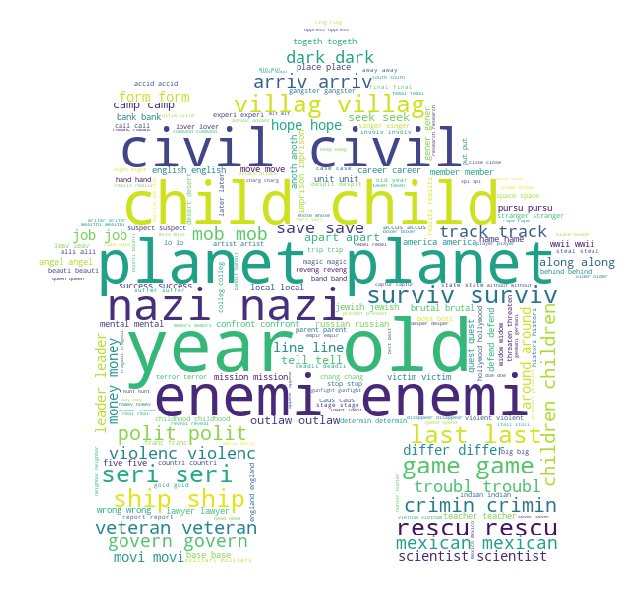

In [638]:
generate_wordcloud(words, mask)

In [639]:
#considering words with frequency > threshold
threshold = 1
vocab = [] # frequent words in your corpus
for item in token_dict:
    if token_dict[item]>=threshold:
        vocab.append(item)

In [640]:
print(vocab) #finally, this gives the vocabulary

['tramp', 'care', 'abandon', 'child', 'event', 'put', 'relationship', 'jeopardi', '.', 'prospector', 'goe', 'klondik', 'search', 'gold', 'find', 'futurist', 'citi', 'sharpli', 'divid', 'work', 'class', 'planner', 'son', "'s", 'mastermind', 'fall', 'love', 'prophet', 'predict', 'come', 'savior', 'mediat', 'differ', 'union', 'spi', 'steal', 'engin', 'belov', 'locomot', 'pursu', 'single-handedli', 'straight', 'enemi', 'line', 'aid', 'wealthi', 'errat', 'tippler', 'dewy-ey', 'ha', 'fallen', 'sightless', 'flower', 'girl', 'accumul', 'money', 'abl', 'help', 'medic', 'polic', 'german', 'unabl', 'catch', 'child-murder', 'crimin', 'join', 'manhunt', 'spoil', 'heiress', 'run', 'away', 'famili', 'man', 'actual', 'report', 'need', 'stori', 'struggl', 'live', 'modern', 'industri', 'societi', 'young', 'homeless', 'woman', 'manipul', 'roguish', 'conduct', 'turbul', 'romanc', 'dure', 'american', 'civil', 'war', 'reconstruct', 'period', 'naiv', 'appoint', 'fill', 'vacanc', 'unit', 'state', 'senat', 'hi

## Bag of Words contd.

In [641]:
import numpy as np

In [642]:
#this is essentially same to what we have done above. Just creating a function for reusability.
def extractWords(sentence):
    tokens = tokenizer(sentence)
    words = []
    for t in tokens:
        if not t.isdigit():
            if t not in stopWordEng:
                words.append(t)
    return words
    

In [643]:
extractWords("girls find tramp and kill him") # test function

['girls', 'find', 'tramp', 'kill']

In [644]:
#
def bagOfWords(sentence, vocab):
    sentenceWords = extractWords(sentence)
    # frequency word count
    bag = np.zeros(len(vocab))
    for sw in sentenceWords:
        for i,word in enumerate(vocab):
            if word == sw: 
                bag[i] += 1
                
    return np.array(bag) #converting list to vector

In [645]:
#testing our model
testSentence = movieData.iloc[1]['desc']
print(testSentence)

A prospector goes to the Klondike in search of gold and finds it and more.


In [709]:
bagOfWords(testSentence, vocab) #test function

array([0., 0., 0., ..., 0., 0., 0.])

In [710]:
import math

def norm(vec):
    mag=0
    for i in vec:
        mag+= i*i
    if mag !=0:
        return math.sqrt(mag)
    else:
        return 1  #to avoid divide by zero
        

In [711]:
def cos(vec1, vec2):
    out = vec1.dot(vec2)
    return out/(norm(vec1)*norm(vec2))

In [712]:

vec1 = np.array([1,1,1])
vec2 = np.array([1,1,1])
cos(vec1,vec2)

1.0000000000000002

In [713]:
# computing cosine similarity between movie 'metropolis' and 'M'
test1 = 'child with tramp'
test2 = 'child with angel'
cos(bagOfWords(test1, vocab), bagOfWords(test2, vocab))

0.4999999999999999

In [728]:
#using sklearn

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer() 

corpus = [] #document collection
for item in movieData['desc']:
    corpus.append(item)

print(corpus)

['The Tramp cares for an abandoned child, but events put that relationship in jeopardy.', 'A prospector goes to the Klondike in search of gold and finds it and more.', "In a futuristic city sharply divided between the working class and the city planners, the son of the city's mastermind falls in love with a working class prophet who predicts the coming of a savior to mediate their differences.", "When Union spies steal an engineer's beloved locomotive, he pursues it single-handedly and straight through enemy lines.", 'With the aid of a wealthy erratic tippler, a dewy-eyed tramp who has fallen in love with a sightless flower girl accumulates money to be able to help her medically.', 'When the police in a German city are unable to catch a child-murderer, other criminals join in the manhunt.', 'A spoiled heiress running away from her family is helped by a man who is actually a reporter in need of a story.', 'The Tramp struggles to live in modern industrial society with the help of a young

In [729]:
BoWModel = vectorizer.fit_transform(corpus)

BoWModel.toarray() #vectorization for all documents in the corpus

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [730]:
print(BoWModel)

  (0, 2852)	1
  (0, 2671)	1
  (0, 4287)	1
  (0, 5226)	1
  (0, 4139)	1
  (0, 1857)	1
  (0, 827)	1
  (0, 985)	1
  (0, 120)	1
  (0, 321)	1
  (0, 2108)	1
  (0, 884)	1
  (0, 5351)	1
  (0, 5228)	1
  (1, 3420)	1
  (1, 2816)	1
  (1, 2050)	1
  (1, 329)	2
  (1, 2287)	1
  (1, 3644)	1
  (1, 4601)	1
  (1, 2961)	1
  (1, 5292)	1
  (1, 2285)	1
  (1, 4082)	1
  :	:
  (1041, 5705)	1
  (1041, 1025)	1
  (1041, 2816)	1
  (1041, 3644)	1
  (1041, 5292)	1
  (1041, 5228)	4
  (1042, 4682)	1
  (1042, 3149)	1
  (1042, 3567)	1
  (1042, 4723)	1
  (1042, 907)	1
  (1042, 882)	1
  (1042, 389)	1
  (1042, 1456)	1
  (1042, 1142)	1
  (1042, 5707)	1
  (1042, 4031)	1
  (1042, 5437)	1
  (1042, 2048)	1
  (1042, 5244)	1
  (1042, 3668)	1
  (1042, 1025)	1
  (1042, 321)	1
  (1042, 2108)	1
  (1042, 5228)	1


In [731]:
vectorizer.get_feature_names()

['000',
 '10',
 '100',
 '11',
 '117',
 '1183',
 '12',
 '12th',
 '13',
 '137',
 '14',
 '1415',
 '15',
 '16',
 '160',
 '161',
 '1692',
 '17',
 '1751',
 '1787',
 '1793',
 '1812',
 '1828',
 '1863',
 '1866',
 '1870s',
 '1881',
 '1884',
 '1885',
 '1890',
 '18th',
 '19',
 '1900s',
 '1901',
 '1905',
 '1906',
 '1909',
 '1910',
 '1920',
 '1920s',
 '1924',
 '1925',
 '1930s',
 '1934',
 '1935',
 '1936',
 '1937',
 '1938',
 '1939',
 '1940',
 '1940s',
 '1941',
 '1942',
 '1943',
 '1944',
 '1947',
 '1948',
 '1950s',
 '1951',
 '1954',
 '1955',
 '1956',
 '1957',
 '1960s',
 '1962',
 '1964',
 '1967',
 '1969',
 '1970',
 '1970s',
 '1971',
 '1972',
 '1974',
 '1976',
 '1978',
 '1980',
 '1980s',
 '1984',
 '1985',
 '1986',
 '1989',
 '1990',
 '1992',
 '1993',
 '1996',
 '1997',
 '1999',
 '19th',
 '20',
 '2001',
 '2006',
 '2007',
 '2008',
 '2009',
 '2015',
 '2027',
 '2029',
 '2057',
 '2142',
 '23',
 '24',
 '25',
 '250',
 '25th',
 '27',
 '28',
 '30',
 '3503',
 '48',
 '500',
 '50s',
 '57',
 '60th',
 '72',
 '74th',
 '7

In [732]:
BoWModel[1].toarray() #Metropolis

array([[0, 0, 0, ..., 0, 0, 0]])

In [733]:
#cosine similarity using sklearn
from sklearn.metrics.pairwise import cosine_similarity as cossim

cossim(BoWModel[1].toarray(), BoWModel[4].toarray() )

array([[0.22097087]])

In [734]:
testSentence= "An imaginary movie with no plot whatsover. But there is a girl and obviously a boy"
vectorizer.transform([testSentence]).toarray()

array([[0, 0, 0, ..., 0, 0, 0]])

## TF IDF Vectorization

In [735]:
#number of documents in corpus
docNo=len(corpus)
print(docNo)

1043


In [736]:
#number of documents with term t

def docsWithTerm(term):
    count=0
    for doc in corpus:
        tokens = tokenizer(doc)
        words = [stemmer.stem(t.lower()) for t in tokens if t not in stopWordEng]
        if term in words:
            count+=1
    if count!= 0:
        return count
    else:
        return 1+count  #to avoid divide by zero

In [737]:
docsWithTerm('prospector')

4

In [738]:
def idf(term):
    return 1+ math.log(docNo/docsWithTerm(term))

In [739]:
import math

idf('prospector')

6.563562093880882

In [740]:
#write a function to calculate TF #for doc in corpus:
def TF(term,doc):
    count = 0
    tokens = tokenizer(doc)
    for terms in tokens:
        if term==terms:
            count+=1        
    return count/len(doc)


In [741]:
TF('abandoned',corpus[0])

0.011764705882352941

In [742]:
#Modify bagOfWord function to compute TF IDF score 
def bagOfWord(term,doc):
    tf = TF(term,doc)
    ideef = idf(term)
    return tf/ideef

In [743]:
bagOfWord('abandoned',corpus[0])

0.0014798639382919271

## TF-IDF Vectorization: Using scikit

In [744]:
#using sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

TfidfModel = tfidf.fit_transform(corpus)
print(TfidfModel)

  (0, 5228)	0.07606499339956888
  (0, 5351)	0.33503983060613907
  (0, 884)	0.3948020599116833
  (0, 2108)	0.15377481829548625
  (0, 321)	0.13215180949659752
  (0, 120)	0.34495774504861604
  (0, 985)	0.2816847540857994
  (0, 827)	0.18653191090117707
  (0, 1857)	0.27838690043176095
  (0, 4139)	0.31939052269442736
  (0, 5226)	0.17583127899240256
  (0, 4287)	0.27527760130059475
  (0, 2671)	0.0988636994234854
  (0, 2852)	0.3948020599116833
  (1, 5228)	0.08600456551010807
  (1, 2671)	0.11178242623349752
  (1, 4082)	0.3900340965837908
  (1, 2285)	0.3079232322045537
  (1, 5292)	0.09465785166830744
  (1, 2961)	0.4463916725376647
  (1, 4601)	0.3415390676291345
  (1, 3644)	0.09927035884351819
  (1, 2287)	0.3611259516987775
  (1, 329)	0.20252348244994028
  (1, 2050)	0.25489112645719597
  :	:
  (1041, 3000)	0.18137083971156817
  (1041, 2541)	0.22709632738359523
  (1041, 4765)	0.21937678690867157
  (1041, 704)	0.22709632738359523
  (1041, 2507)	0.23704854598512837
  (1041, 5137)	0.25107541028291347


In [745]:
print((tfidf.idf_).shape)

(5863,)


In [746]:
print(len(tfidf.vocabulary_))

5863


In [747]:
cossim(TfidfModel[0:1], TfidfModel) #similarity of first movie with others in the document

array([[1.        , 0.01759316, 0.02614575, ..., 0.03683667, 0.01471819,
        0.03604814]])

In [748]:
cossim(TfidfModel[1:2], TfidfModel[4:5])

array([[0.0273571]])

In [682]:
print(tfidf.transform([testSentence]))

  (0, 5757)	0.18844610204684784
  (0, 5239)	0.37819754696543634
  (0, 3926)	0.3399815319324341
  (0, 3576)	0.4125247891637442
  (0, 3445)	0.4288223287024198
  (0, 2809)	0.18133076875879406
  (0, 2264)	0.32314497798005803
  (0, 827)	0.250442773740295
  (0, 748)	0.3253253226255256
  (0, 329)	0.12024418482328786
  (0, 321)	0.1774305831384591


## Word2vec or doc2vec

In [683]:
from gensim.models import Word2Vec

In [684]:
#creating doc collection
corpus = []
for desc in movieData['desc']:
    corpus.append(desc)

In [685]:
print(corpus)

['The Tramp cares for an abandoned child, but events put that relationship in jeopardy.', 'A prospector goes to the Klondike in search of gold and finds it and more.', "In a futuristic city sharply divided between the working class and the city planners, the son of the city's mastermind falls in love with a working class prophet who predicts the coming of a savior to mediate their differences.", "When Union spies steal an engineer's beloved locomotive, he pursues it single-handedly and straight through enemy lines.", 'With the aid of a wealthy erratic tippler, a dewy-eyed tramp who has fallen in love with a sightless flower girl accumulates money to be able to help her medically.', 'When the police in a German city are unable to catch a child-murderer, other criminals join in the manhunt.', 'A spoiled heiress running away from her family is helped by a man who is actually a reporter in need of a story.', 'The Tramp struggles to live in modern industrial society with the help of a young

In [686]:
from nltk import sent_tokenize

def preprocess(corpus):
    preprocessCorpus = [] #list of tokenized documents
    for doc in corpus:   #iterating over documents in corpus
        sentences = sent_tokenize(doc)   #tokenize document into sentences
        for sentence in sentences:
            sentence = sentence.lower()
            tokens = tokenizer(sentence)
            out=[]
            for t in tokens:
                if not t.isdigit():
                    if t not in stopWordEng:
                        out.append(t)
        preprocessCorpus.append(out)
    return preprocessCorpus

In [687]:
corpus = preprocess(corpus) #word2vec model works on tokens in documents. 

In [688]:
w2vModel = Word2Vec(corpus, min_count=1, size=100)

In [689]:
print(w2vModel)

Word2Vec(vocab=5260, size=100, alpha=0.025)


In [690]:
w2vModel.wv.vocab  #words in vocabulary

{'tramp': <gensim.models.keyedvectors.Vocab at 0x7f440899b8d0>,
 'cares': <gensim.models.keyedvectors.Vocab at 0x7f4409bb66d8>,
 'abandoned': <gensim.models.keyedvectors.Vocab at 0x7f4409bf09e8>,
 'child': <gensim.models.keyedvectors.Vocab at 0x7f4409bf0940>,
 'events': <gensim.models.keyedvectors.Vocab at 0x7f4409bf08d0>,
 'put': <gensim.models.keyedvectors.Vocab at 0x7f4409bf0898>,
 'relationship': <gensim.models.keyedvectors.Vocab at 0x7f4409bf0828>,
 'jeopardy': <gensim.models.keyedvectors.Vocab at 0x7f4409bf0860>,
 'prospector': <gensim.models.keyedvectors.Vocab at 0x7f4409bf07f0>,
 'goes': <gensim.models.keyedvectors.Vocab at 0x7f4409bf07b8>,
 'klondike': <gensim.models.keyedvectors.Vocab at 0x7f4409bf0748>,
 'search': <gensim.models.keyedvectors.Vocab at 0x7f4409bf0780>,
 'gold': <gensim.models.keyedvectors.Vocab at 0x7f4409bf0710>,
 'finds': <gensim.models.keyedvectors.Vocab at 0x7f4409bf06d8>,
 'futuristic': <gensim.models.keyedvectors.Vocab at 0x7f4409bf0630>,
 'city': <gensi

In [691]:
print(w2vModel['tramp']) #vector representation for 'tramp'

[ 0.00095527  0.00349906  0.00175093 -0.00480292  0.00367964  0.00062371
  0.00331409 -0.00018493  0.00144149 -0.00373517  0.00013009  0.0050161
  0.00304603 -0.00235651  0.00407919  0.00031668 -0.00371636  0.00277439
 -0.00456961 -0.0023073   0.00041352  0.00261688 -0.00142508  0.00256909
  0.00407136  0.00004392 -0.0011894   0.00513192 -0.0024135  -0.0009915
 -0.00019496 -0.00436919 -0.00347969  0.00371261 -0.00127783  0.00043636
 -0.00212874 -0.00009816  0.00055148 -0.00166194  0.00076898  0.00408042
 -0.00224484  0.00411375 -0.00343444 -0.00325222  0.00345506 -0.00388298
 -0.00260016 -0.00329944  0.00141198  0.00130475  0.00056121  0.00406355
 -0.00437427 -0.00243414 -0.00308325  0.00066009  0.00001689  0.00353021
  0.0019273   0.00309584  0.0006734  -0.00233941  0.00107277  0.00082549
  0.00351321 -0.00252508  0.00428012 -0.00286998 -0.00020405  0.00251556
 -0.00197701 -0.00039578 -0.001549   -0.0031076   0.00224904  0.00444308
  0.00173318  0.00115354 -0.00145895 -0.00034669 -0.0

/home/mayank/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [692]:
sim_words = w2vModel.wv.most_similar('tramp') #returns top -10 most similar words

In [693]:
print(sim_words)

[('concept', 0.3475528061389923), ('plain', 0.3458516299724579), ('juggled', 0.3364652395248413), ('film', 0.32692137360572815), ('germany', 0.31562885642051697), ('heat', 0.31555691361427307), ('awakenings', 0.31507962942123413), ('watches', 0.30807358026504517), ('henry', 0.30789345502853394), ('location', 0.3067706227302551)]


In [699]:
w2vModel.similarity('tramp', 'child')

/home/mayank/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


0.21508187

In [700]:
cos(w2vModel['tramp'], w2vModel['child'])  #our function

/home/mayank/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


0.2150818830993656

## Visualizing word embeddings

In [701]:
from sklearn.manifold import TSNE

In [707]:
def display_closestwords_tsnescatterplot(model, word):
    
    arr = np.empty((0,100), dtype='f') #creating array to store vectors for similar words
    #50 -length of word vector set during training w2vModel
    
    wordLabels = [word] #list, with word already added

    # get close words
    closeWords = model.similar_by_word(word)  #returns a list of words with simila
    
    # add the vector for each of the closest words to the array
    arr = np.append(arr, np.array([model[word]]), axis=0) #adding vector for 'word'
    
    #running a loop to add close words
    for word in closeWords:
        wordVector = model[word[0]] # returns vector 
        wordLabels.append(word[0]) #appends label
        arr = np.append(arr, np.array([wordVector]), axis=0)
       
    
    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    # display scatter plot
    plt.scatter(Y[:, 0], Y[:, 1])

    for label, x, y in zip(wordLabels, Y[:, 0], Y[:, 1]): #printing labels
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')

    plt.show()

/home/mayank/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).
  if __name__ == '__main__':
/home/mayank/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if sys.path[0] == '':
/home/mayank/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  app.launch_new_instance()


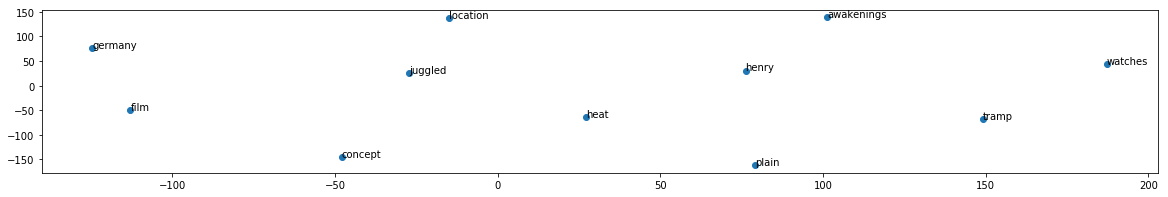

In [708]:
display_closestwords_tsnescatterplot(w2vModel, 'tramp')